In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./input/lending-club-loan-data/loan.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Loan Distributions

    Number of loans has been consistently increasing over the last 10 years.
    There does not seem to be a strong seasonality of loans during any of the 12 months. Though loans are lowest in Feb and maximum in October

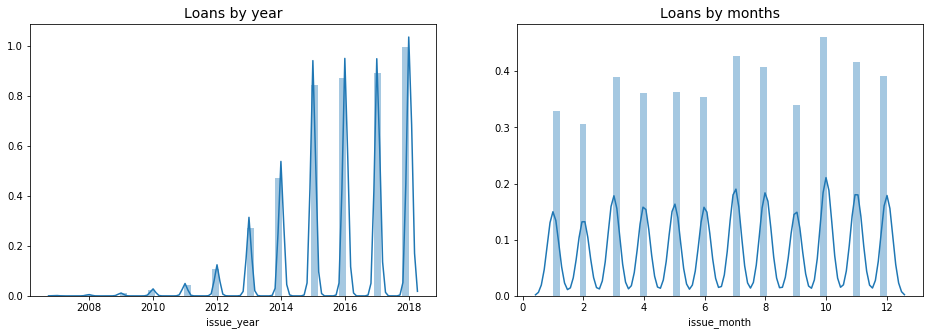

In [3]:
issue_d_series = pd.to_datetime(data['issue_d'])
data['issue_month'] = issue_d_series.dt.month
data['issue_year'] = issue_d_series.dt.year

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(data['issue_year'], ax=ax[0], label='loan year')
ax[0].set_title("Loans by year", fontsize=14)

sns.distplot(data['issue_month'], ax=ax[1], label='loan year')
ax[1].set_title("Loans by months", fontsize=14)

plt.show()

## Loan Amount Analysis

### Observations
    Loan requested, Loan funded and amount invested by investors is nearly same.

Median of loan amount is  12900.0


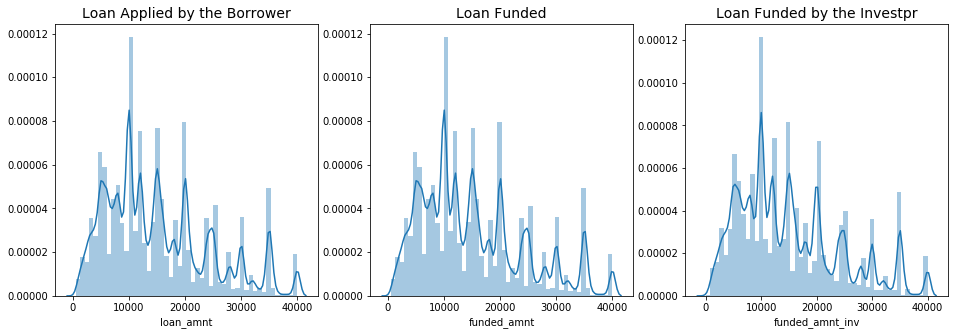

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(data['loan_amnt'], ax=ax[0], label='loan_amnt')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(data['funded_amnt'], ax=ax[1],  label='loan_amnt')
ax[1].set_title("Loan Funded", fontsize=14)
sns.distplot(data['funded_amnt_inv'], ax=ax[2],  label='loan_amnt')
ax[2].set_title("Loan Funded by the Investpr", fontsize=14)

print ('Median of loan amount is ', np.median(data['loan_amnt']))

In [5]:
data["loan_status"].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

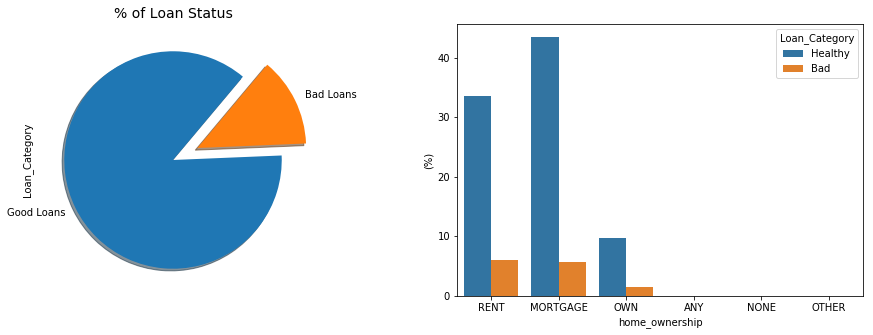

In [6]:
good_loans = ['Fully Paid','Current']

def good_or_bad_loan(loan_status):
    if loan_status in good_loans:
        return 'Healthy'
    else :
        return 'Bad'
        
data["Loan_Category"] = data['loan_status'].apply(good_or_bad_loan)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Good Loans", "Bad Loans"

ax[0].set_title("% of Loan Status", fontsize=14)
data["Loan_Category"].value_counts().plot.pie(explode=[0,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="home_ownership", y="loan_amnt", hue="Loan_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

#### We can see that most bad loans belong to Loan grade 'C'

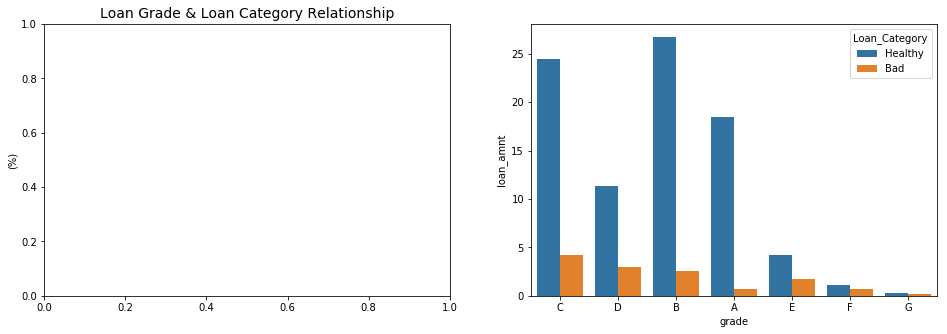

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Loan Grade & Loan Category Relationship", fontsize=14)
sns.barplot(x="grade", y="loan_amnt", hue="Loan_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

#### Most of the loans which turned BAD were taken for the purpose of 'Debt Consolidation'

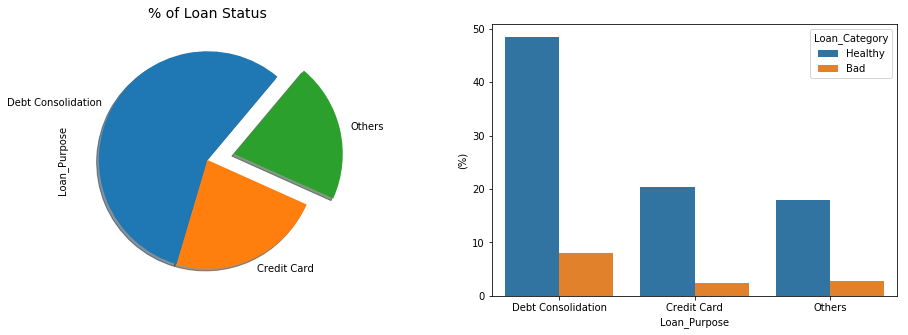

In [10]:
def loan_purpose(loan_status):
    if loan_status == 'debt_consolidation':
        return 'Debt Consolidation'
    elif loan_status == 'credit_card' :
        return 'Credit Card'
    else :
        return 'Others'
        
data["Loan_Purpose"] = data['purpose'].apply(loan_purpose)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Debt Consolidation", "Credit Card", "Others"

ax[0].set_title("% of Loan Status", fontsize=14)
data["Loan_Purpose"].value_counts().plot.pie(explode=[0,0,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Purpose", y="loan_amnt", hue="Loan_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

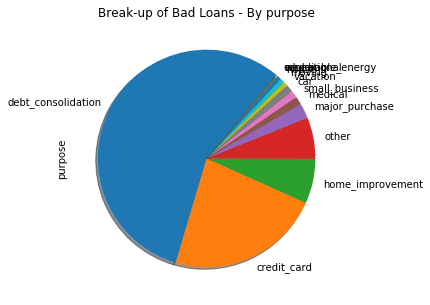

In [11]:
bad_loans = data.loc[data["Loan_Category"]=='Bad']
data["purpose"].value_counts().plot.pie(shadow=True, startangle=50, title='Break-up of Bad Loans - By purpose', figsize=(16,5))


## Interest Rate Analysis

#### Observation 1: Most Interest rates are <15%, howevere a small percentage of loands is at a very higher interest rate

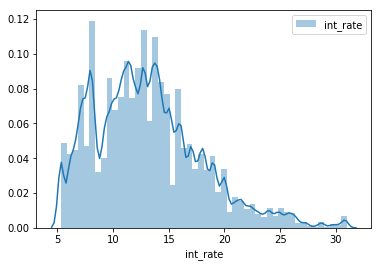

In [12]:
sns.distplot(data['int_rate'], hist=True, label='int_rate')
plt.legend()
plt.show()
data_int_rates_gt_15 = data.loc[data['int_rate']>15]
data_int_rates_lt_15 = data.loc[data['int_rate']<15]

#### Relation B/w Interest Rates & Loan Amount

    For low interest rates the median loan amount is 13k for high interest rates the median loan is high.
    For low interest rates the median annual income is 68k for high interest rates the annual income is 60K

In [13]:
print ('Median of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['loan_amnt']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['loan_amnt']))
print ('\nMedian of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['annual_inc']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['annual_inc']))

Median of loan account where interest rates is <15% 12000.0
Median of loan account where interest rates is >15% 15000.0

Median of loan account where interest rates is <15% nan
Median of loan account where interest rates is >15% 60000.0


C:\MachineLearning\anaconda\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [14]:
def get_interest_rate_slabs(annual_inc):
    if annual_inc < 10 :
        return 'Low'
    elif annual_inc > 20:
        return 'V High'
    else :
        return 'High'
        
data["Interest_Rate_Slabs"] = data['int_rate'].apply(get_interest_rate_slabs)

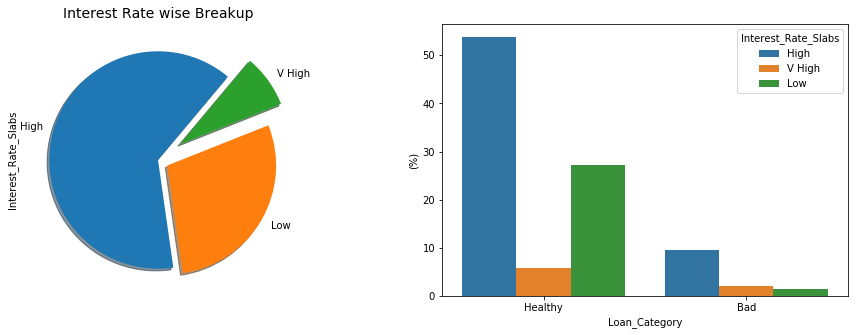

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data["Interest_Rate_Slabs"].value_counts().plot.pie(explode=[0,0.1,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Interest_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Income Category

In [16]:
#sns.distplot(data['annual_inc'], color='y', label='Ann Income')

In [17]:
def get_income_cat(annual_inc):
    if annual_inc < 50000 :
        return 'Poor'
    elif annual_inc > 100000:
        return 'Rich'
    else :
        return 'Medium'
        
data["Income_Category"] = data['annual_inc'].apply(get_income_cat)

In [18]:
data["Income_Category"].value_counts()

Medium    1175213
Poor       638302
Rich       447153
Name: Income_Category, dtype: int64

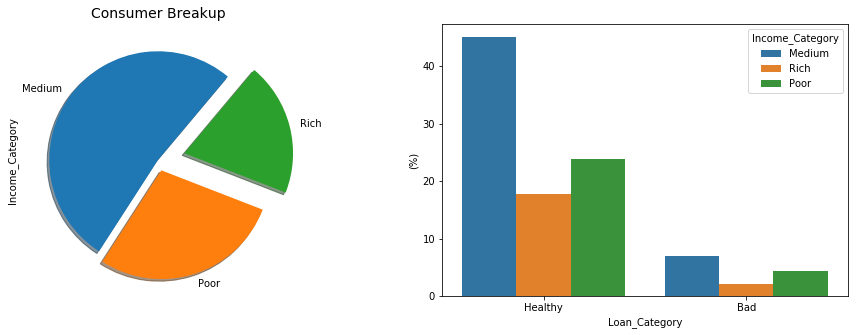

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Medium", "Poor", "Rich"

ax[0].set_title("Consumer Breakup", fontsize=14)
data["Income_Category"].value_counts().plot.pie(explode=[0,0.1,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Income_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Geography

In [20]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


data['region'] = data['addr_state'].apply(finding_regions)

In [21]:
data["region"].value_counts()

SouthEast    550165
NorthEast    519095
West         515469
MidWest      403150
SouthWest    272789
Name: region, dtype: int64

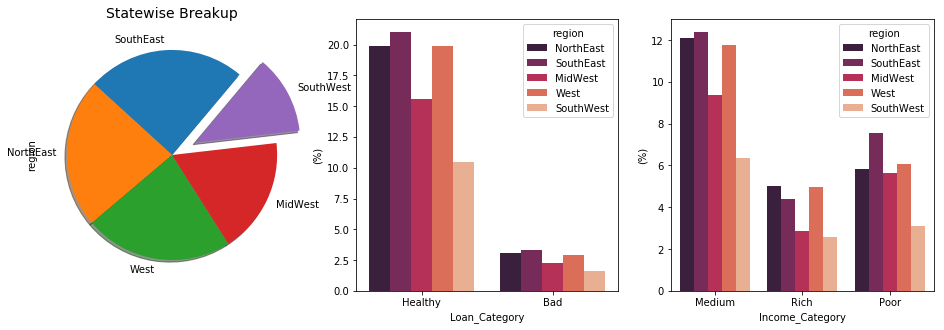

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

ax[0].set_title("Statewise Breakup", fontsize=14)
data["region"].value_counts().plot.pie(explode=[0,0,0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="region", ax=ax[1], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

sns.barplot(x="Income_Category", y="loan_amnt", hue="region", ax=ax[2], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[2].set(ylabel="(%)")

plt.show()

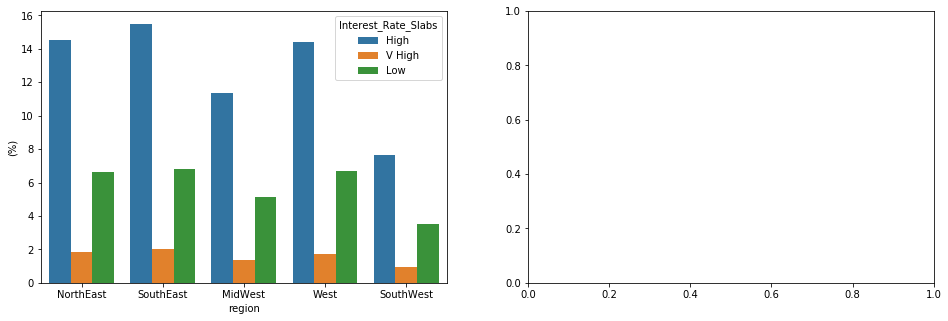

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(x="region", y="loan_amnt", ax=ax[0], hue="Interest_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

### Analysis by Employment Length

    1. Across all regions people with more years of experience took loans, max loans taken by people with 10+ exp
    2. Most bad loans caused by people with most years of experience
    

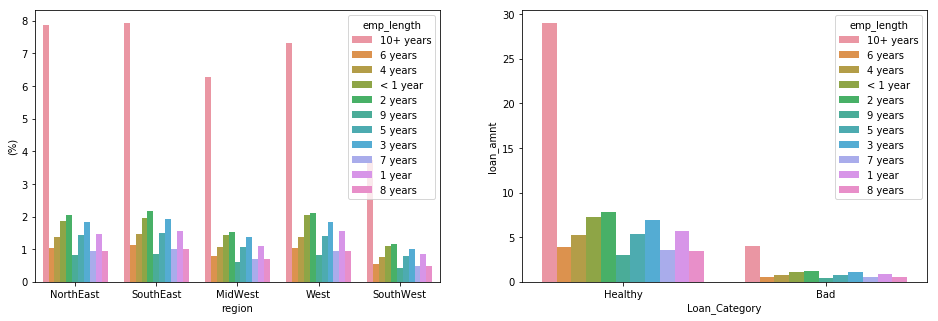

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(x="region", y="loan_amnt", ax=ax[0], hue="emp_length", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

sns.barplot(x="Loan_Category", y="loan_amnt", ax=ax[1], hue="emp_length", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

### Loan Disbersment Types

    Most loans were distributed by Cash

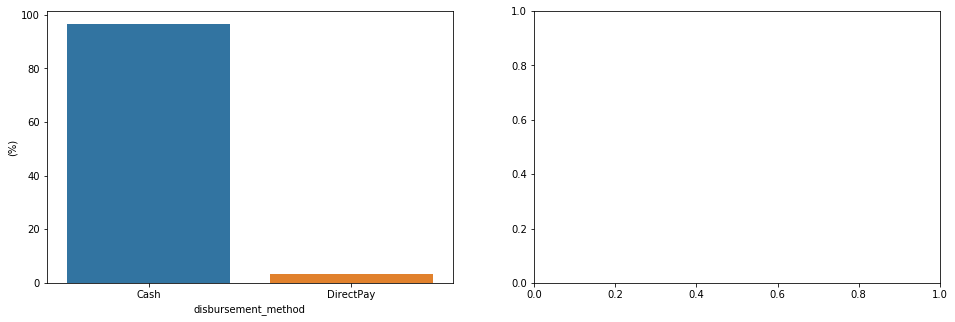

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(x="disbursement_method", y="loan_amnt", ax=ax[0], data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

In [26]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        
        return mz_table

table_data = missing_zero_values_table(data)

Your selected dataframe has 152 columns and 2260668 Rows.
There are 113 columns that have missing values.


In [27]:
missing_values_md = table_data.loc[table_data['% of Total Values']>80]
series = missing_values_md['Data Type']
cols_to_del = series.keys()
cleaned_data = data.drop(cols_to_del, axis=1)

In [28]:
## Also remove these columsn
cleaned_data = data.drop(['sub_grade','issue_d','loan_status','purpose','addr_state','hardship_flag','int_rate','Income_Category'], axis=1)

In [29]:
# print number of features and shape of data
print ('Number of records is ',cleaned_data.shape[0])
print ('Number of features is ',len(cleaned_data.columns))

cleaned_data.to_csv('./input/lending-club-loan-data/loan_enhanced.csv')

Number of records is  2260668
Number of features is  144


In [30]:
missing_zero_values_table(cleaned_data)

Your selected dataframe has 144 columns and 2260668 Rows.
There are 113 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
id,0,2260668,100.0,2260668,100.0,float64
url,0,2260668,100.0,2260668,100.0,float64
member_id,0,2260668,100.0,2260668,100.0,float64
orig_projected_additional_accrued_interest,0,2252242,99.6,2252242,99.6,float64
hardship_length,0,2250055,99.5,2250055,99.5,float64
hardship_reason,0,2250055,99.5,2250055,99.5,object
hardship_status,0,2250055,99.5,2250055,99.5,object
deferral_term,0,2250055,99.5,2250055,99.5,float64
hardship_amount,0,2250055,99.5,2250055,99.5,float64
hardship_start_date,0,2250055,99.5,2250055,99.5,object


In [31]:
import gc
gc.collect()

40570